# For Z test

In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

df = pd.read_csv("passport.csv")
print(df.head(10))

   processing_time
0             16.0
1             16.0
2             30.0
3             37.0
4             25.0
5             22.0
6             19.0
7             35.0
8             27.0
9             32.0


In [2]:
df.head()

,processing_time
0,16.0
1,16.0
2,30.0
3,37.0
4,25.0


## One sample Z test

In [3]:
#step 1, checking either series is normally distributed or not.
df['processing_time'].head()

0    16.0
1    16.0
2    30.0
3    37.0
4    25.0
Name: processing_time, dtype: float64

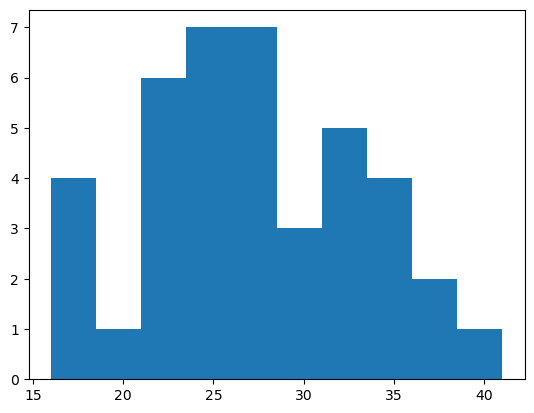

In [4]:
plt.hist(df['processing_time'])
plt.show()

C:\Users\davidc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='processing_time', ylabel='Density'>

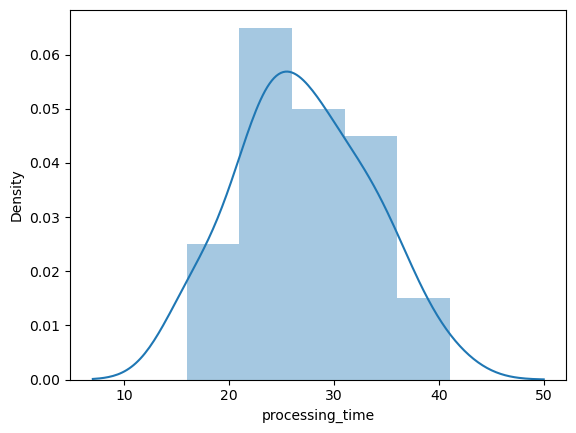

In [5]:
import seaborn as sns
# sns.distplot( a=df['processing_time'], hist=True, kde=False, rug=False )
sns.distplot( a=df['processing_time'] )

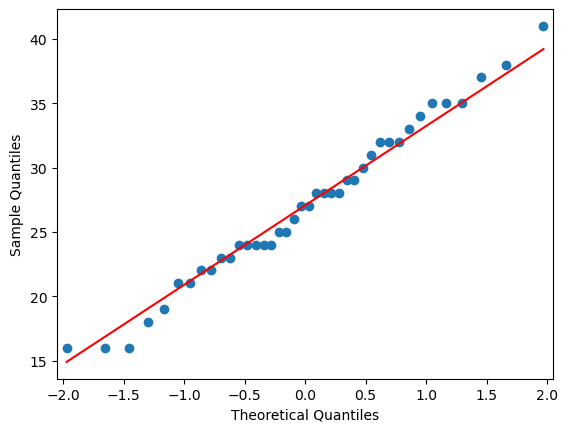

In [6]:
# another way to find normality is through QQ plot
from statsmodels.graphics.gofplots import qqplot
qqplot(df['processing_time'], line='s')
plt.show()

### through Kurtosis and skewness

<b>kurtosis<b>

Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.

Skewness > 0: Then more weight in the left tail of the distribution.

Skewness < 0: Then more weight in the right tail of the distribution.

<b>Syntax:<b>

scipy.stats.skew(array, axis=0, bias=True)

Parameters or arguments:

    array: It represents the input array (or object) containing elements.

    axis: It signifies the axis along which we want to find the skewness value (By default axis = 0).

    bias = False: Calculations are corrected to statistical bias.
    
Return Type:

Skewness value of the data set, along the axis.

<b>Kurtosis:<b>

kurtosis for normal distribution is equal to 3.

For a distribution having kurtosis < 3: It is called playkurtic.

For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.
    
<b>Syntax:<b>

scipy.stats.kurtosis(array, axis=0, fisher=True, bias=True)

Parameters:

array: Input array or object having the elements.
axis: It represents the axis along which the kurtosis value is to be measured. By default axis = 0.
fisher = True: The fisher’s definition will be used (normal 0.0).
fisher =  False: The Pearson’s definition will be used (normal 3.0).
Bias = True: Calculations are corrected for statistical bias, if set to False.
Return Type:

Kurtosis value of the normal distribution for the data set.
    
    
source:  https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/

In [7]:
from scipy.stats import skew
from scipy.stats import kurtosis
sk = skew(df['processing_time'], bias=False)
ku = kurtosis(df['processing_time'], bias=False, fisher=False)
# print(" skewness is:   ", sk, "     kurtosis is:  ", ku )
print(f"skewness is: {sk:.3f}   and   kurtosis is:  {ku:.3f}")

skewness is: 0.136   and   kurtosis is:  2.512


## D’Agostino’s K^2 Test for normality

In [8]:
from scipy.stats import normaltest
stat, p = normaltest(df['processing_time'])
# Null hypothesis is " Data is normal"
print('Statistics=  %.3f,   p=  %.3f' % (stat, p))

Statistics=  0.554,   p=  0.758


In [9]:
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0). Hence, data is normal')
else:
 print('Sample does not look Gaussian (reject H0). Hence, data is not normal')

Sample looks Gaussian (fail to reject H0). Hence, data is normal


## One Sample Z test

statsmodels.stats.weightstats.ztest(x1, x2=None, value=0)

where:

x1: values for the first sample

x2: values for the second sample (if performing a two sample z-test)

value: mean under the null (in one sample case) or mean difference (in two sample case)



Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15.

A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.



In [10]:
from statsmodels.stats.weightstats import ztest as ztest
#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
zvalue, p = ztest(data, value=100, alternative = 'two-sided') # other alternative values are 'larger' and 'smaller'
# value argument is mean of sample if we are taking one sample
print('z value is  %.3f,  and  P value is   %.3f' % (stat, p))

# code source: https://www.statology.org/z-test-python/

z value is  0.554,  and  P value is   0.110


The test statistic for the one sample z-test is 1.5976 and the corresponding p-value is 0.1101.

Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ level.

## Two Sample Z-Test

Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.

In [11]:

#enter IQ levels for 20 individuals from each city
from statsmodels.stats.weightstats import ztest as ztest
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
zvalue, p = ztest(cityA, cityB, value=0) 
print('z value is  %.3f,  and  P value is   %.3f' % (stat, p))

# code source: https://www.statology.org/z-test-python/

z value is  0.554,  and  P value is   0.046


The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.

Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities.

# z test for practice

a passport office claims that the possport applaications are parocessed within 30 days of submitting the application from and all necessary documents. the file passport .csv contains processing time of 40 passport applicant. the population standard deviation of the processing time is 12.5 days. conduct sa hypothesis test at signidicance level alpha = 0.05 to verify the claim made by the possport office. 

## t-test

### One-Sample t tes


arvind prodcutions (AP) is a newly formed movie production house based out of mumbai, india. AP was interested in understainding the producgion cost required for producing a bollywood movie. the industry believes that the production house will require INR 500 million on average. it is assumed that the bollywood movie production cost follows a normal distribution. the production costs of 40 bollywood moviesin millions of rupees are fiven in bollywood movies.CSV file. conduct a appropriate hypothesis test at alpha = 0.05 to check whether the belief about average production cost is correct.

In [12]:
from scipy import stats
bollywood_movies_df = pd.read_csv( 'bollywoodmovies.csv' )
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


In [13]:
print(list(bollywood_movies_df.production_cost)) 

[601, 627, 330, 364, 562, 353, 583, 254, 528, 470, 125, 60, 101, 110, 60, 252, 281, 227, 484, 402, 408, 601, 593, 729, 402, 530, 708, 599, 439, 762, 292, 636, 444, 286, 636, 667, 252, 335, 457, 632]


In [14]:
stats.ttest_1samp( bollywood_movies_df.production_cost, 500 ) 

Ttest_1sampResult(statistic=-2.2845532872667547, pvalue=0.027862556406761777)

In [15]:
stat, p = stats.ttest_1samp( bollywood_movies_df.production_cost, 500 ) 
print('Statistic t value is  %.3f,  and  P value is   %.3f' % (stat, p))

Statistic t value is  -2.285,  and  P value is   0.028


this returns -2.285 value for t-statistics and 0.028 for p value. this implies the sample mean is less than population mean and has only 2.7 percent probability of being part of the distribution with a population mean of 500. as p value fis less than 0.05. we can conclude that the sample mean rejects that the production cost is equal to 500

## two sample t test

a company claims that children (in the age group between 7 and 12) who drink theri (the company's) health drink will grow taller than the children who do nto drink that health drink. Data in the file healthdrink.xlsx shows average increase in height over one year period from two groups : one drinking he health drink and the other not drinking the health drink.at alpha = 0.05, test whether the increase in height for the children who drink the health drink is different than those who do not drink health drink.

In [16]:
# null hypothesis that there is no difference in the mean fo two population

healthdrink_yes_df = pd.read_excel( 'healthdrink.xlsx', 'healthdrink_yes') 
healthdrink_yes_df.head(5) 

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [17]:
healthdrink_yes_df.columns

Index(['height_increase'], dtype='object')

In [18]:
healthdrink_no_df = pd.read_excel( 'healthdrink.xlsx', 'healthdrink_no') 
healthdrink_no_df.head(5) 

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


C:\Users\davidc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\davidc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


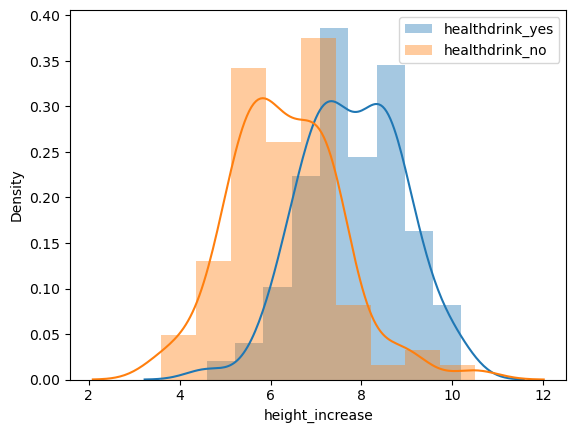

In [19]:
sns.distplot( healthdrink_yes_df['height_increase'], label ='healthdrink_yes' ) 
sns.distplot( healthdrink_no_df['height_increase'], label ='healthdrink_no' ) 
plt.legend(); 

In [20]:
stats.ttest_ind(healthdrink_yes_df['height_increase'], healthdrink_no_df['height_increase']) 

Ttest_indResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13)

In [21]:
t_statistics, p_value = stats.ttest_ind(healthdrink_yes_df['height_increase'], healthdrink_no_df['height_increase']) 
print(f"t statistic is equal to :  {t_statistics:.3f}   and   its repespective P value is :   {p_value:.3f}")

t statistic is equal to :  8.132   and   its repespective P value is :   0.000


the probability of the samples belonging to the same distribution is almost 0. This means that the increase in height for those who had health drink is significantly differnet thatn those who did not 